In [7]:
from utils import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from utils import *
import numpy as np
import pandas as pd
import argparse
import wandb
import numpy as np
import pandas as pd
parser = argparse.ArgumentParser()
# parser.add_argument('--device', type=str, default='cuda:3', help='Device to train the model on')
# parser.add_argument('--epochs', type=int, default=10, help='Number of epochs for training')
# parser.add_argument('--lr', type=float, default=0.001, help='Learning rate for training')
# parser.add_argument('--batch_size', type=int, default=4096, help='Batch size for training')
# parser.add_argument('--batch_size_emb', type=int, default=4096, help='Batch size for embedding')
# parser.add_argument('--lambda_loss', type=float, default=1, help='Lambda for loss function')
# parser.add_argument('--only_reg_flag', type=int, default=0, help='Flag for only regularizer')
# parser.add_argument('--max_steps', type=int, default=10000, help='Max steps for training')
# parser.add_argument('--model_path', type=str, default='Models/higg_4096_1',
#                     help='Path to the Model to create embeddings')
# parser.add_argument('--net_depth',type=int,default= 1,
#                     help='Depth of the network')
# parser.add_argument('--eps', type=float, default=1.0,
#                     help='Set epsilon for the model')
                    
# args = parser.parse_args()

device = torch.device("cuda:2")
epochs = 1



print("**Starting data processing** \n \n ")
data=pd.read_csv('data/training.csv')
df_data = data.drop(columns=['EventId','Weight'])
X = df_data.drop(columns=['Label'])  # Features

X = np.asarray(pd.get_dummies(X, columns=['PRI_jet_num'], prefix='PRI_jet_num').values, dtype = np.float32)
X = X/np.linalg.norm(X, axis=1).max()
y = df_data['Label'].values  # Target
y = np.where(y == 's', 1, 0)
y = np.asarray(y, dtype = np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import torch

# Convert X_train and X_test to tensors
x_train_tensor = torch.tensor(X_train)
x_test_tensor = torch.tensor(X_test)

# Convert y_train and y_test to tensors
y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)
import torch
import torch.nn as nn

print("\n \n ** Creating embeddings ** \n \n ",len(y_train_tensor))
model_path = 'Models/higg_4096_1'
state_dict = torch.load(model_path)

# Create an instance of Net
net = Net_new(1,device=device)
net.load_state_dict(state_dict)
trainloader = torch.utils.data.DataLoader(list(zip(x_train_tensor, y_train_tensor)), batch_size=4096, shuffle=False)
X_emb_train, losses_train = create_model_embs2(net,trainloader,device= device,l=len(y_train_tensor),h=0.8)
x_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# x_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
testloader = torch.utils.data.DataLoader(list(zip(x_test_tensor, y_test_tensor)), batch_size=4096, shuffle=False)
X_emb_test, losses_test = create_model_embs2(net,testloader,device= device,l=len(y_test_tensor),h=0.8)
losses_train,indices = torch.sort(losses_train)

# set_eps = args.eps
# ind = (losses_train < set_eps).sum()



# X_emb_train_priv = X_emb_train[indices][:ind]
# Y_train = y_train_tensor[indices][:ind]

**Starting data processing** 
 
 

 
 ** Creating embeddings ** 
 
  200000


  0%|          | 0/49 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [4]:


# Print the directory names
print(directory_names)

['higg_512_50', 'higg_4096_1']


In [8]:
model_path = 'Models/higg_4096_1'

In [9]:
 os.walk('./Embeddings')

<generator object walk at 0x7f9d646e6e40>

In [10]:
# embs_path_folder = './Embeddings/higg_512_50'
# torch.save(X_emb_train,embs_path_folder+'/X_emb_train.pt')
# torch.save(X_emb_test,embs_path_folder+'/X_emb_test.pt')
# torch.save(losses_train,embs_path_folder+'/losses_train.pt')
# torch.save(losses_test,embs_path_folder+'/losses_test.pt')

In [15]:
import os
import torch
model_path = 'Models/higg_512_100'
def get_folders(directory):
    folders = []
    for root, dirs, files in os.walk(directory):
        for dir in dirs:
            folders.append(dir)
    return folders

# Specify the directory path
directory_path = './Embeddings'

# Call the function to get the directory names
directory_names = get_folders(directory_path)

if(model_path[7:] in directory_names):
    dirpth =  './Embeddings/'+model_path[7:]
    X_emb_train = torch.load(dirpth+'/X_emb_train.pt')
    X_emb_test = torch.load(dirpth+'/X_emb_test.pt')
    losses_train = torch.load(dirpth+'/losses_train.pt')
    losses_test = torch.load(dirpth+'/losses_test.pt')
    
import matplotlib.pyplot as plt

# Assuming losses_test is a list or array containing the loss values


# Filter the losses within the range of 0 and 2
filtered_losses = [loss for loss in losses_train if 0 <= loss <= 2]

# Plot the histogram
plt.hist(filtered_losses, bins=230, range=(0, 2))
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title('Histogram of Losses')
plt.show()

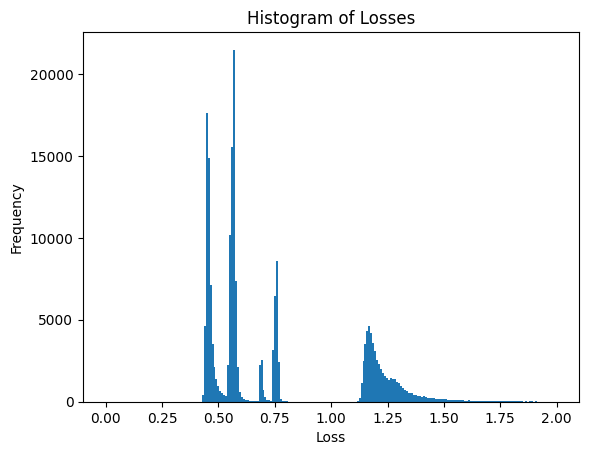

In [16]:
import matplotlib.pyplot as plt

# Assuming losses_test is a list or array containing the loss values


# Filter the losses within the range of 0 and 2
filtered_losses = [loss for loss in losses_train if 0 <= loss <= 2]

# Plot the histogram
plt.hist(filtered_losses, bins=230, range=(0, 2))
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title('Histogram of Losses')
plt.show()

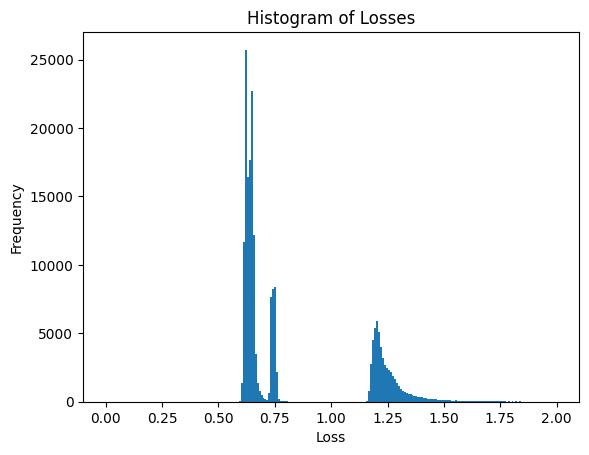

In [32]:
import matplotlib.pyplot as plt

# Assuming losses_test is a list or array containing the loss values


# Filter the losses within the range of 0 and 2
filtered_losses = [loss for loss in losses_train if 0 <= loss <= 2]

# Plot the histogram
plt.hist(filtered_losses, bins=230, range=(0, 2))
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title('Histogram of Losses')
plt.show()

In [13]:
losses_test

[0.5, 1.2, 1.8, 0.9, 1.5, 2.1, 0.3, 1.7, 0.6, 1.3]